# Preprocessing of the dataset
suggestions
- do not one-hot encode connections BUT instead 1. The total travel time; 2. The number of connections (0,1,2)
- The accuracy in your specific model is tricky to read because you are actually not classifying (in 0 or 1) your targeted variable, but you are predicting a continuous number (the traffic) – therefore I would look at other metrics, e.g., MSE
- If you want still to use accuracy, what you can do is a two-steps approach model: first you calculate which route have traffic different from zero (classification problem, traffic = 0 or not) and second you calculate the actual traffic (the continuous market share variable). If you multiply the two results you could reach a better model performance.

In [10]:
# prepare
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load & join the data

In [11]:
# read a merged dataset
df = pd.read_csv('./dataset/data_org.csv').drop(columns='Unnamed: 0')
df.head()

,Orig,con1_arr,con1,con2_arr,con2,Dest,mkt_airline1,mkt_flight1,op_airline1,op_flight1,...,detour,arrDay,stops,dmcc,nLegs,paxe,cluster,OnD,TOT_pax,market_share
0,SXF,CAI,CAI,NaN,NaN,MED,MS,732.0,MS,732.0,...,1.02676,3.0,1.0,NaN,2.0,0.0,111.0,SXF-MED,0.0,0.0
1,SXF,CAI,CAI,NaN,NaN,MED,MS,732.0,MS,732.0,...,1.02676,5.0,1.0,NaN,2.0,0.0,111.0,SXF-MED,0.0,0.0
2,SXF,CAI,CAI,NaN,NaN,MED,MS,732.0,MS,732.0,...,1.02676,5.0,1.0,NaN,2.0,0.0,111.0,SXF-MED,0.0,0.0
3,SXF,CAI,CAI,NaN,NaN,MED,MS,732.0,MS,732.0,...,1.02676,6.0,1.0,NaN,2.0,0.0,111.0,SXF-MED,0.0,0.0
4,SXF,CAI,CAI,NaN,NaN,MED,MS,732.0,MS,732.0,...,1.02676,7.0,1.0,NaN,2.0,0.0,111.0,SXF-MED,0.0,0.0


## 2. Clean the data

In [12]:
df.columns

Index(['Orig', 'con1_arr', 'con1', 'con2_arr', 'con2', 'Dest', 'mkt_airline1',
       'mkt_flight1', 'op_airline1', 'op_flight1', 'depDay1', 'd_time_1',
       'a_time_1', 'depTime_U1', 'arrTime_U1', 'acrt1', 'distSeg1',
       'mkt_airline2', 'mkt_flight2', 'op_airline2', 'op_flight2', 'depDay2',
       'd_time_2', 'a_time_2', 'depTime_U2', 'arrTime_U2', 'acrt2', 'distSeg2',
       'mkt_airline3', 'mkt_flight3', 'op_airline3', 'op_flight3', 'depDay3',
       'd_time_3', 'a_time_3', 'depTime_U3', 'arrTime_U3', 'acrt3', 'distSeg3',
       'dist', 'segn', 'week', 'depDay', 'deptime', 'deptime_U', 'arrtime',
       'arrtime_U', 'elaptime', 'detour', 'arrDay', 'stops', 'dmcc', 'nLegs',
       'paxe', 'cluster', 'OnD', 'TOT_pax', 'market_share'],
      dtype='object')

### STEP 2: DROP

[what to include]<br/>
1. Input
- user: 'Orig', 'Dest', 'depDay', 'arrDay', 
- inside of a model: <br/>
  'detour': (distseg1+distseg2+distseg3)/dist)<br/>
- little details that could be included or not: 'distSeg1', 'distSeg2', 'distSeg3', 'con1', 'con2', 'elaptime', 'detour', 'cluster',
  1. The total travel time: 'deptime_U', 'arrtime_U', 
  2. The number of connections (0,1,2): 'stops', 
  3. The waiting time at connection (departure date/time of the connection – the departure time of the origin of the travel).
  - waiting time: 'arrTime_U1', 'depTime_U2', 'arrTime_U2', 'depTime_U3',
  4. use the direction of the traffic (inbound and outbound) and the airlines name.
  - 'mkt_flight1', 'op_flight1',  'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3', 


2. output
- Routes overview: Provides statistics and map visualization about the itinerary contained in the data source (or a subset)<br/>
- Market model: Estimations of traffic (passengers) for itinerary and market cluster, applying Transformer Graph Models/ML models: 'market_share', 'TOT_pax', 'paxe', <br/>
  For any network itinerary entered in the app, the estimated traffic is provided.<br/>
  Based on the market model estimation, a ranking of all itinerary in the dataset per estimated traffic, with recommendations for creation or cancellation of routes.<br/>
  Per market cluster, the accuracy of the model is provided.
- little details: 'stops'



[what to drop]<br/>
- 'con1_arr', 'con2_arr': trivial
- 'mkt_airline1', 'op_airline1', 'acrt1', 'mkt_airline2', 'op_airline2', 'acrt2', 'mkt_airline3', 'op_airline3', 'acrt3' 
- 'dmcc': compartment (economic, business)
- 'dist': will calculate the real distance by distSeg1 + ... / also 'detour' exists
- 'week': minor detail / also, can use depDay1
- 'nLegs', 'segn', 
- 'd_time_1', 'a_time_1', 'd_time_2', 'a_time_2', 'd_time_3', 'a_time_3': too much detail
- 'depDay1', 'depDay2', 'depDay3',
- 'OnD': info provided by Orig and Dest column / also recommended by lecturers
- 'deptime', 'arrtime', 'OnD', 'arrTime_U3', 'depTime_U1',

In [13]:
df = df.drop(columns=['con1_arr', 'con2_arr', 'mkt_airline1', 'op_airline1', 'depDay1', 'd_time_1', 'a_time_1', 'acrt1',
                      'mkt_airline2', 'op_airline2', 'd_time_2', 'a_time_2', 'acrt2', 
                      'mkt_airline3', 'op_airline3', 'd_time_3', 'a_time_3', 'acrt3', 
                      'dist', 'deptime', 'arrtime', 'dmcc', 'nLegs', 'segn', 'OnD', 
                      'arrTime_U3', 'depTime_U1', 'depDay2', 'depDay3', 'week'])

### STEP 3: DATA TYPE

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522806 entries, 0 to 522805
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Orig          522806 non-null  object 
 1   con1          518673 non-null  object 
 2   con2          125417 non-null  object 
 3   Dest          522806 non-null  object 
 4   mkt_flight1   522806 non-null  float64
 5   op_flight1    522806 non-null  float64
 6   arrTime_U1    522806 non-null  object 
 7   distSeg1      522806 non-null  float64
 8   mkt_flight2   518673 non-null  float64
 9   op_flight2    518673 non-null  float64
 10  depTime_U2    518673 non-null  object 
 11  arrTime_U2    518673 non-null  object 
 12  distSeg2      522806 non-null  float64
 13  mkt_flight3   125417 non-null  float64
 14  op_flight3    125417 non-null  float64
 15  depTime_U3    125417 non-null  object 
 16  distSeg3      171211 non-null  float64
 17  depDay        522806 non-null  float64
 18  dept

In [15]:
# Data Type: 
# convert the column to a datetime data type.
df['deptime_U'] = pd.to_datetime(df['deptime_U'])
df['arrtime_U'] = pd.to_datetime(df['arrtime_U'])

# check the content
df.head()

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,arrTime_U1,distSeg1,mkt_flight2,op_flight2,...,deptime_U,arrtime_U,elaptime,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share
0,SXF,CAI,NaN,MED,732.0,732.0,2019-09-17 17:45:00+00:00,2872.51,675.0,675.0,...,2019-09-17 13:45:00+00:00,2019-09-17 22:40:00+00:00,535.0,1.02676,3.0,1.0,0.0,111.0,0.0,0.0
1,SXF,CAI,NaN,MED,732.0,732.0,2019-09-19 17:45:00+00:00,2872.51,675.0,675.0,...,2019-09-19 13:45:00+00:00,2019-09-19 22:40:00+00:00,535.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0
2,SXF,CAI,NaN,MED,732.0,732.0,2019-09-19 17:45:00+00:00,2872.51,318.0,318.0,...,2019-09-19 13:45:00+00:00,2019-09-20 02:40:00+00:00,775.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0
3,SXF,CAI,NaN,MED,732.0,732.0,2019-09-20 17:45:00+00:00,2872.51,675.0,675.0,...,2019-09-20 13:45:00+00:00,2019-09-20 22:40:00+00:00,535.0,1.02676,6.0,1.0,0.0,111.0,0.0,0.0
4,SXF,CAI,NaN,MED,732.0,732.0,2019-09-21 17:45:00+00:00,2872.51,675.0,675.0,...,2019-09-21 13:45:00+00:00,2019-09-21 22:40:00+00:00,535.0,1.02676,7.0,1.0,0.0,111.0,0.0,0.0


### STEP 4: MISSING VALUES
https://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values

In [16]:
# see missing values
df.isna().sum()

Orig                 0
con1              4133
con2            397389
Dest                 0
mkt_flight1          0
op_flight1           0
arrTime_U1           0
distSeg1             0
mkt_flight2       4133
op_flight2        4133
depTime_U2        4133
arrTime_U2        4133
distSeg2             0
mkt_flight3     397389
op_flight3      397389
depTime_U3      397389
distSeg3        351595
depDay               0
deptime_U            0
arrtime_U            0
elaptime             0
detour               0
arrDay               0
stops                0
paxe                 0
cluster              0
TOT_pax              0
market_share         0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.simplefilter(action='ignore')

le = LabelEncoder()
cols = ['con1', 'con2', 'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3']
df[cols] = df[cols].astype(str)

for col in cols:
  # replace missing values with a string constant
  df[col].loc[pd.isnull(df[col])]  = 'NaN'
  # apply LabelEncoder
  if col != 'con1' and col != 'con2':
    df[col] = le.fit_transform(df[col])

df.head()

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,arrTime_U1,distSeg1,mkt_flight2,op_flight2,...,deptime_U,arrtime_U,elaptime,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share
0,SXF,CAI,nan,MED,732.0,732.0,2019-09-17 17:45:00+00:00,2872.51,3021,2624,...,2019-09-17 13:45:00+00:00,2019-09-17 22:40:00+00:00,535.0,1.02676,3.0,1.0,0.0,111.0,0.0,0.0
1,SXF,CAI,nan,MED,732.0,732.0,2019-09-19 17:45:00+00:00,2872.51,3021,2624,...,2019-09-19 13:45:00+00:00,2019-09-19 22:40:00+00:00,535.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0
2,SXF,CAI,nan,MED,732.0,732.0,2019-09-19 17:45:00+00:00,2872.51,1772,1748,...,2019-09-19 13:45:00+00:00,2019-09-20 02:40:00+00:00,775.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0
3,SXF,CAI,nan,MED,732.0,732.0,2019-09-20 17:45:00+00:00,2872.51,3021,2624,...,2019-09-20 13:45:00+00:00,2019-09-20 22:40:00+00:00,535.0,1.02676,6.0,1.0,0.0,111.0,0.0,0.0
4,SXF,CAI,nan,MED,732.0,732.0,2019-09-21 17:45:00+00:00,2872.51,3021,2624,...,2019-09-21 13:45:00+00:00,2019-09-21 22:40:00+00:00,535.0,1.02676,7.0,1.0,0.0,111.0,0.0,0.0


### STEP 5: column edition

In [20]:
## Calculate the real distances
# Preparation: fill in nas with 0
df['distSeg1'] = df['distSeg1'].fillna(0)
df['distSeg2'] = df['distSeg2'].fillna(0)
df['distSeg3'] = df['distSeg3'].fillna(0)

# Calculate the actual distance for each trip
df['real_dist'] = df['distSeg1'] + df['distSeg2'] + df['distSeg3']
df.drop(columns=['distSeg1', 'distSeg2', 'distSeg3'], inplace=True)
df['real_dist'][:5]

0    3899.12
1    3899.12
2    3899.12
3    3899.12
4    3899.12
Name: real_dist, dtype: float64

In [21]:
# 1. The total travel time
df['total_time'] = pd.to_datetime(df['arrtime_U']) - pd.to_datetime(df['deptime_U'])
# df.drop(columns=['arrtime_U', 'deptime_U'])
df['total_time'] = pd.to_timedelta(df['total_time'], unit='s') / pd.Timedelta(minutes=1)
df['total_time'][:5]

0    535.0
1    535.0
2    775.0
3    535.0
4    535.0
Name: total_time, dtype: float64

In [22]:
# 2. time for connection
df['connection_time'] = (pd.to_datetime(df['depTime_U2']) - pd.to_datetime(df['arrTime_U1'])) + (pd.to_datetime(df['depTime_U3']) - pd.to_datetime(df['arrTime_U2']))
df.drop(columns=['arrTime_U1', 'depTime_U2', 'depTime_U3', 'arrTime_U2'], inplace=True)
df['connection_time'] = pd.to_timedelta(df['connection_time'], unit='s') / pd.Timedelta(minutes=1)
df['connection_time'] = df['connection_time'].fillna(0)
df['connection_time'][:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: connection_time, dtype: float64

In [23]:
print(df.columns)
display(df.head())

Index(['Orig', 'con1', 'con2', 'Dest', 'mkt_flight1', 'op_flight1',
       'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3', 'depDay',
       'deptime_U', 'arrtime_U', 'elaptime', 'detour', 'arrDay', 'stops',
       'paxe', 'cluster', 'TOT_pax', 'market_share', 'real_dist', 'total_time',
       'connection_time'],
      dtype='object')


,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,...,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time
0,SXF,CAI,nan,MED,732.0,732.0,3021,2624,1450,1101,...,1.02676,3.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
1,SXF,CAI,nan,MED,732.0,732.0,3021,2624,1450,1101,...,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
2,SXF,CAI,nan,MED,732.0,732.0,1772,1748,1450,1101,...,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,775.0,0.0
3,SXF,CAI,nan,MED,732.0,732.0,3021,2624,1450,1101,...,1.02676,6.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
4,SXF,CAI,nan,MED,732.0,732.0,3021,2624,1450,1101,...,1.02676,7.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0


In [25]:
# Label encoding of Orig, con1, con2, Dest
# Random Forests = scale invariant. do not assume higher weightage for large values & figure out how best to split up the numeric values to meet your objective
# https://datascience.stackexchange.com/questions/92647/encode-the-days-of-week-as-numeric-variable
# https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f
# https://towardsdatascience.com/handling-categorical-data-the-right-way-9d1279956fc6
# -- we use rf, hence, big number doesn't matter.

# 1. mapping airports to countries
# Create a dictionary to map unique combinations of "OnD" to category numbers
airport = pd.read_csv('./dataset/airport-codes_csv.csv') #.drop(columns='Airport')
airport = airport[~pd.isnull(airport['iata_code'])][['iso_country', 'iata_code']].reset_index(drop=True)
air_cou_mapping = {d['iata_code']: d['iso_country'] for d in airport.to_dict(orient='records')}
df[['Orig', 'con1', 'con2', 'Dest']] = df[['Orig', 'con1', 'con2', 'Dest']].replace(air_cou_mapping)
df

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,...,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time
0,DE,EG,nan,SA,732.0,732.0,3021,2624,1450,1101,...,1.02676,3.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
1,DE,EG,nan,SA,732.0,732.0,3021,2624,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
2,DE,EG,nan,SA,732.0,732.0,1772,1748,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,775.0,0.0
3,DE,EG,nan,SA,732.0,732.0,3021,2624,1450,1101,...,1.02676,6.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
4,DE,EG,nan,SA,732.0,732.0,3021,2624,1450,1101,...,1.02676,7.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522801,CA,CH,nan,DE,8011.0,11.0,3681,3060,1450,1101,...,1.14720,5.0,1.0,1.72,1601.0,12.90,0.13,8924.92,1010.0,0.0
522802,CA,DE,nan,DE,493.0,493.0,209,210,1450,1101,...,1.00260,6.0,1.0,0.86,1601.0,419.68,0.00,8357.96,1190.0,0.0
522803,US,CA,nan,DE,7549.0,7549.0,3753,3114,1450,1101,...,1.06360,5.0,1.0,0.86,1601.0,873.76,0.00,6261.15,1180.0,0.0
522804,US,US,US,DE,295.0,295.0,2370,2221,1401,1075,...,1.17720,3.0,2.0,1.72,1601.0,20.64,0.08,10910.47,1090.0,217.0


In [26]:
# 2. countries to label
countries_lst = list(air_cou_mapping.values())
countries_lst = [x for i, x in enumerate(countries_lst) if x not in countries_lst[:i]]
# print(countries_lst)
countries_to_num = {v:i for i,v in enumerate(countries_lst)}
# print(countries_to_num)
df[['Orig', 'con1', 'con2', 'Dest']] = df[['Orig', 'con1', 'con2', 'Dest']].replace(countries_to_num)
df.head()

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,...,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time
0,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,3.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
1,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
2,26,64,nan,181,732.0,732.0,1772,1748,1450,1101,...,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,775.0,0.0
3,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,6.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0
4,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,7.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0


In [27]:
# check for rows which are not converted
indexes = []
for idx, row in df.iterrows():
  try:
    if type(row['Orig']) != int or type(row['con1']) != int or type(row['con2']) != int or type(row['Dest']) != int:
      indexes.append(idx)
  except TypeError:
    continue

df.loc[indexes]

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,...,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time
0,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,3.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
1,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
2,26,64,nan,181,732.0,732.0,1772,1748,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,775.0,0.0
3,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,6.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
4,26,64,nan,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,7.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522797,1,148,nan,26,9.0,9.0,1988,1299,1450,1101,...,1.01690,5.0,1.0,0.86,1601.0,3144.16,0.00,7388.72,1130.0,0.0
522800,1,1,nan,26,2022.0,2022.0,405,407,1450,1101,...,1.11440,6.0,1.0,0.86,1601.0,316.48,0.00,10440.42,895.0,0.0
522801,41,148,nan,26,8011.0,11.0,3681,3060,1450,1101,...,1.14720,5.0,1.0,1.72,1601.0,12.90,0.13,8924.92,1010.0,0.0
522802,41,26,nan,26,493.0,493.0,209,210,1450,1101,...,1.00260,6.0,1.0,0.86,1601.0,419.68,0.00,8357.96,1190.0,0.0


In [36]:
# save the dictionary for country code - num
dic = pd.DataFrame({'country': countries_to_num.keys(), 'code': countries_to_num.values()})
dic.loc[len(dic)] = ['nan', 239]
dic.to_csv('./dataset/country_to_num.csv')

In [28]:
print(df.loc[indexes].Orig.unique())
print(df.loc[indexes].con1.unique())
print(df.loc[indexes].con2.unique())
print(df.loc[indexes].Dest.unique())

[26 65 71 67 98 60 74 70 8 44 153 'XOJ' 'SAJ' 130 143 138 149 47 147 82 81
 27 62 54 224 167 150 225 226 55 56 53 80 109 49 42 113 50 83 112 111 91
 107 123 5 19 24 59 92 17 89 32 52 36 87 97 58 103 101 105 104 100 99 39
 64 1 222 'ZFV' 41 'XDS' 68 'ZYR' 'XJU' 'XJJ' 7 86 15 96 'BQC']
[64 149 98 26 148 70 54 'nan' 65 138 6 181 180 30 182 130 80 184 183 8 58
 145 154 60 167 187 109 147 47 71 44 141 74 79 72 63 76 62 77 81 136 150
 230 85 129 9 143 139 226 142 27 122 123 55 56 53 106 50 91 111 104 24 15
 57 42 1 41 29 158 16 48 195 49 162 185 25 128 140 146 225 'XOC' 155 83]
['nan' 180 70 65 60 98 26]
[181 30 182 6 184 142 183 180 'DMS' 138 47 44 8 153 98 60 74 70 130 143 81
 62 147 82 27 150 225 54 224 167 226 'XJJ' 145 148 'LZS' 'ZDH' 'ZSB' 65 71
 67 154 77 136 149 139 140 155 156 141 135 26 'QDU' 'ZAQ' 'QFB' 'XHJ' 128
 'ZVJ' 'XOJ' 'QRH' 'RZG' 'SAJ' 'XJU']


In [37]:
# manually mapping
extra_mapping = {'XOJ': 8, 'SAJ': 131, 'ZFV': 1, 'XDS': 41, 'ZYR': 60, 'XJU': 8, 'XJJ': 8, 'BQC': 41, 'XOC': 8, 'nan': 239, 'DMS': 1,
                 'LZS': 145, 'ZDH': 148, 'ZSB': 145, 'QDU': 26, 'ZAQ': 26, 'QFB': 26, 'XHJ': 26, 'ZVJ': 6, 'QRH': 70, 'RZG': 8}

cols = ['Orig', 'con1', 'con2', 'Dest']
for col in cols:
  df[col] = df[col].apply(lambda x: extra_mapping[x] if x in extra_mapping else x)

# check whether they're mapped correctly
df.loc[indexes]

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,...,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time
0,26,64,239,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,3.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
1,26,64,239,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
2,26,64,239,181,732.0,732.0,1772,1748,1450,1101,...,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,775.0,0.0
3,26,64,239,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,6.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
4,26,64,239,181,732.0,732.0,3021,2624,1450,1101,...,1.02676,7.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522797,1,148,239,26,9.0,9.0,1988,1299,1450,1101,...,1.01690,5.0,1.0,0.86,1601.0,3144.16,0.00,7388.72,1130.0,0.0
522800,1,1,239,26,2022.0,2022.0,405,407,1450,1101,...,1.11440,6.0,1.0,0.86,1601.0,316.48,0.00,10440.42,895.0,0.0
522801,41,148,239,26,8011.0,11.0,3681,3060,1450,1101,...,1.14720,5.0,1.0,1.72,1601.0,12.90,0.13,8924.92,1010.0,0.0
522802,41,26,239,26,493.0,493.0,209,210,1450,1101,...,1.00260,6.0,1.0,0.86,1601.0,419.68,0.00,8357.96,1190.0,0.0


## 3. Filter data

In [38]:
df.columns

Index(['Orig', 'con1', 'con2', 'Dest', 'mkt_flight1', 'op_flight1',
       'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3', 'depDay',
       'deptime_U', 'arrtime_U', 'elaptime', 'detour', 'arrDay', 'stops',
       'paxe', 'cluster', 'TOT_pax', 'market_share', 'real_dist', 'total_time',
       'connection_time'],
      dtype='object')

In [41]:
# preprocess time further
df['deptime_U'] = df['deptime_U'].dt.time
df['arrtime_U'] = df['arrtime_U'].dt.time

# Departure time
# Extract dep_hour
df['dep_hour'] = [time_obj.hour for time_obj in df['deptime_U']]
df['dep_min'] = [time_obj.minute for time_obj in df['deptime_U']]

# Arrival time
# Extract arr_hour
df['arr_hour'] = [time_obj.hour for time_obj in df['arrtime_U']]
df['arr_min'] = [time_obj.minute for time_obj in df['arrtime_U']]

# drop
df.drop(columns=['deptime_U', 'arrtime_U'], inplace=True)

In [43]:
# show df fully
# Configure pandas to display all columns
pd.set_option('display.max_columns', None)

# Print the entire DataFrame
display(df)

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,depDay,elaptime,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time,dep_hour,dep_min,arr_hour,arr_min
0,26,64,239,181,732.0,732.0,3021,2624,1450,1101,2.0,535.0,1.02676,3.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0,13,45,22,40
1,26,64,239,181,732.0,732.0,3021,2624,1450,1101,4.0,535.0,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0,13,45,22,40
2,26,64,239,181,732.0,732.0,1772,1748,1450,1101,4.0,775.0,1.02676,5.0,1.0,0.00,111.0,0.00,0.00,3899.12,775.0,0.0,13,45,2,40
3,26,64,239,181,732.0,732.0,3021,2624,1450,1101,5.0,535.0,1.02676,6.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0,13,45,22,40
4,26,64,239,181,732.0,732.0,3021,2624,1450,1101,6.0,535.0,1.02676,7.0,1.0,0.00,111.0,0.00,0.00,3899.12,535.0,0.0,13,45,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522801,41,148,239,26,8011.0,11.0,3681,3060,1450,1101,4.0,1010.0,1.14720,5.0,1.0,1.72,1601.0,12.90,0.13,8924.92,1010.0,0.0,23,35,16,25
522802,41,26,239,26,493.0,493.0,209,210,1450,1101,5.0,1190.0,1.00260,6.0,1.0,0.86,1601.0,419.68,0.00,8357.96,1190.0,0.0,23,20,19,10
522803,1,41,239,26,7549.0,7549.0,3753,3114,1450,1101,4.0,1180.0,1.06360,5.0,1.0,0.86,1601.0,873.76,0.00,6261.15,1180.0,0.0,10,30,6,10
522804,1,1,1,26,295.0,295.0,2370,2221,1401,1075,2.0,1090.0,1.17720,3.0,2.0,1.72,1601.0,20.64,0.08,10910.47,1090.0,217.0,13,0,7,10


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522806 entries, 0 to 522805
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Orig             522806 non-null  int64  
 1   con1             522806 non-null  int64  
 2   con2             522806 non-null  int64  
 3   Dest             522806 non-null  int64  
 4   mkt_flight1      522806 non-null  float64
 5   op_flight1       522806 non-null  float64
 6   mkt_flight2      522806 non-null  int32  
 7   op_flight2       522806 non-null  int32  
 8   mkt_flight3      522806 non-null  int32  
 9   op_flight3       522806 non-null  int32  
 10  depDay           522806 non-null  float64
 11  elaptime         522806 non-null  float64
 12  detour           522806 non-null  float64
 13  arrDay           522806 non-null  float64
 14  stops            522806 non-null  float64
 15  paxe             522806 non-null  float64
 16  cluster          522806 non-null  floa

In [45]:
df.shape

(522806, 26)

## 4. Engineer features

### STEP 6: feature selection

In [46]:
df.columns

Index(['Orig', 'con1', 'con2', 'Dest', 'mkt_flight1', 'op_flight1',
       'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3', 'depDay',
       'elaptime', 'detour', 'arrDay', 'stops', 'paxe', 'cluster', 'TOT_pax',
       'market_share', 'real_dist', 'total_time', 'connection_time',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min'],
      dtype='object')

### 5. Explore data

In [48]:
X = df.loc[:, ['Orig', 'con1', 'con2', 'Dest', 'mkt_flight1', 'op_flight1',
       'mkt_flight2', 'op_flight2', 'mkt_flight3', 'op_flight3', 'depDay',
       'elaptime', 'detour', 'arrDay', 'stops', 'paxe', 'cluster', 'TOT_pax',
       'real_dist', 'total_time', 'connection_time',
       'dep_hour', 'dep_min', 'arr_hour', 'arr_min']]
X.head()

,Orig,con1,con2,Dest,mkt_flight1,op_flight1,mkt_flight2,op_flight2,mkt_flight3,op_flight3,depDay,elaptime,detour,arrDay,stops,paxe,cluster,TOT_pax,real_dist,total_time,connection_time,dep_hour,dep_min,arr_hour,arr_min
0,26,64,239,181,732.0,732.0,3021,2624,1450,1101,2.0,535.0,1.02676,3.0,1.0,0.0,111.0,0.0,3899.12,535.0,0.0,13,45,22,40
1,26,64,239,181,732.0,732.0,3021,2624,1450,1101,4.0,535.0,1.02676,5.0,1.0,0.0,111.0,0.0,3899.12,535.0,0.0,13,45,22,40
2,26,64,239,181,732.0,732.0,1772,1748,1450,1101,4.0,775.0,1.02676,5.0,1.0,0.0,111.0,0.0,3899.12,775.0,0.0,13,45,2,40
3,26,64,239,181,732.0,732.0,3021,2624,1450,1101,5.0,535.0,1.02676,6.0,1.0,0.0,111.0,0.0,3899.12,535.0,0.0,13,45,22,40
4,26,64,239,181,732.0,732.0,3021,2624,1450,1101,6.0,535.0,1.02676,7.0,1.0,0.0,111.0,0.0,3899.12,535.0,0.0,13,45,22,40


In [49]:
y = df.loc[:, 'market_share']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: market_share, dtype: float64

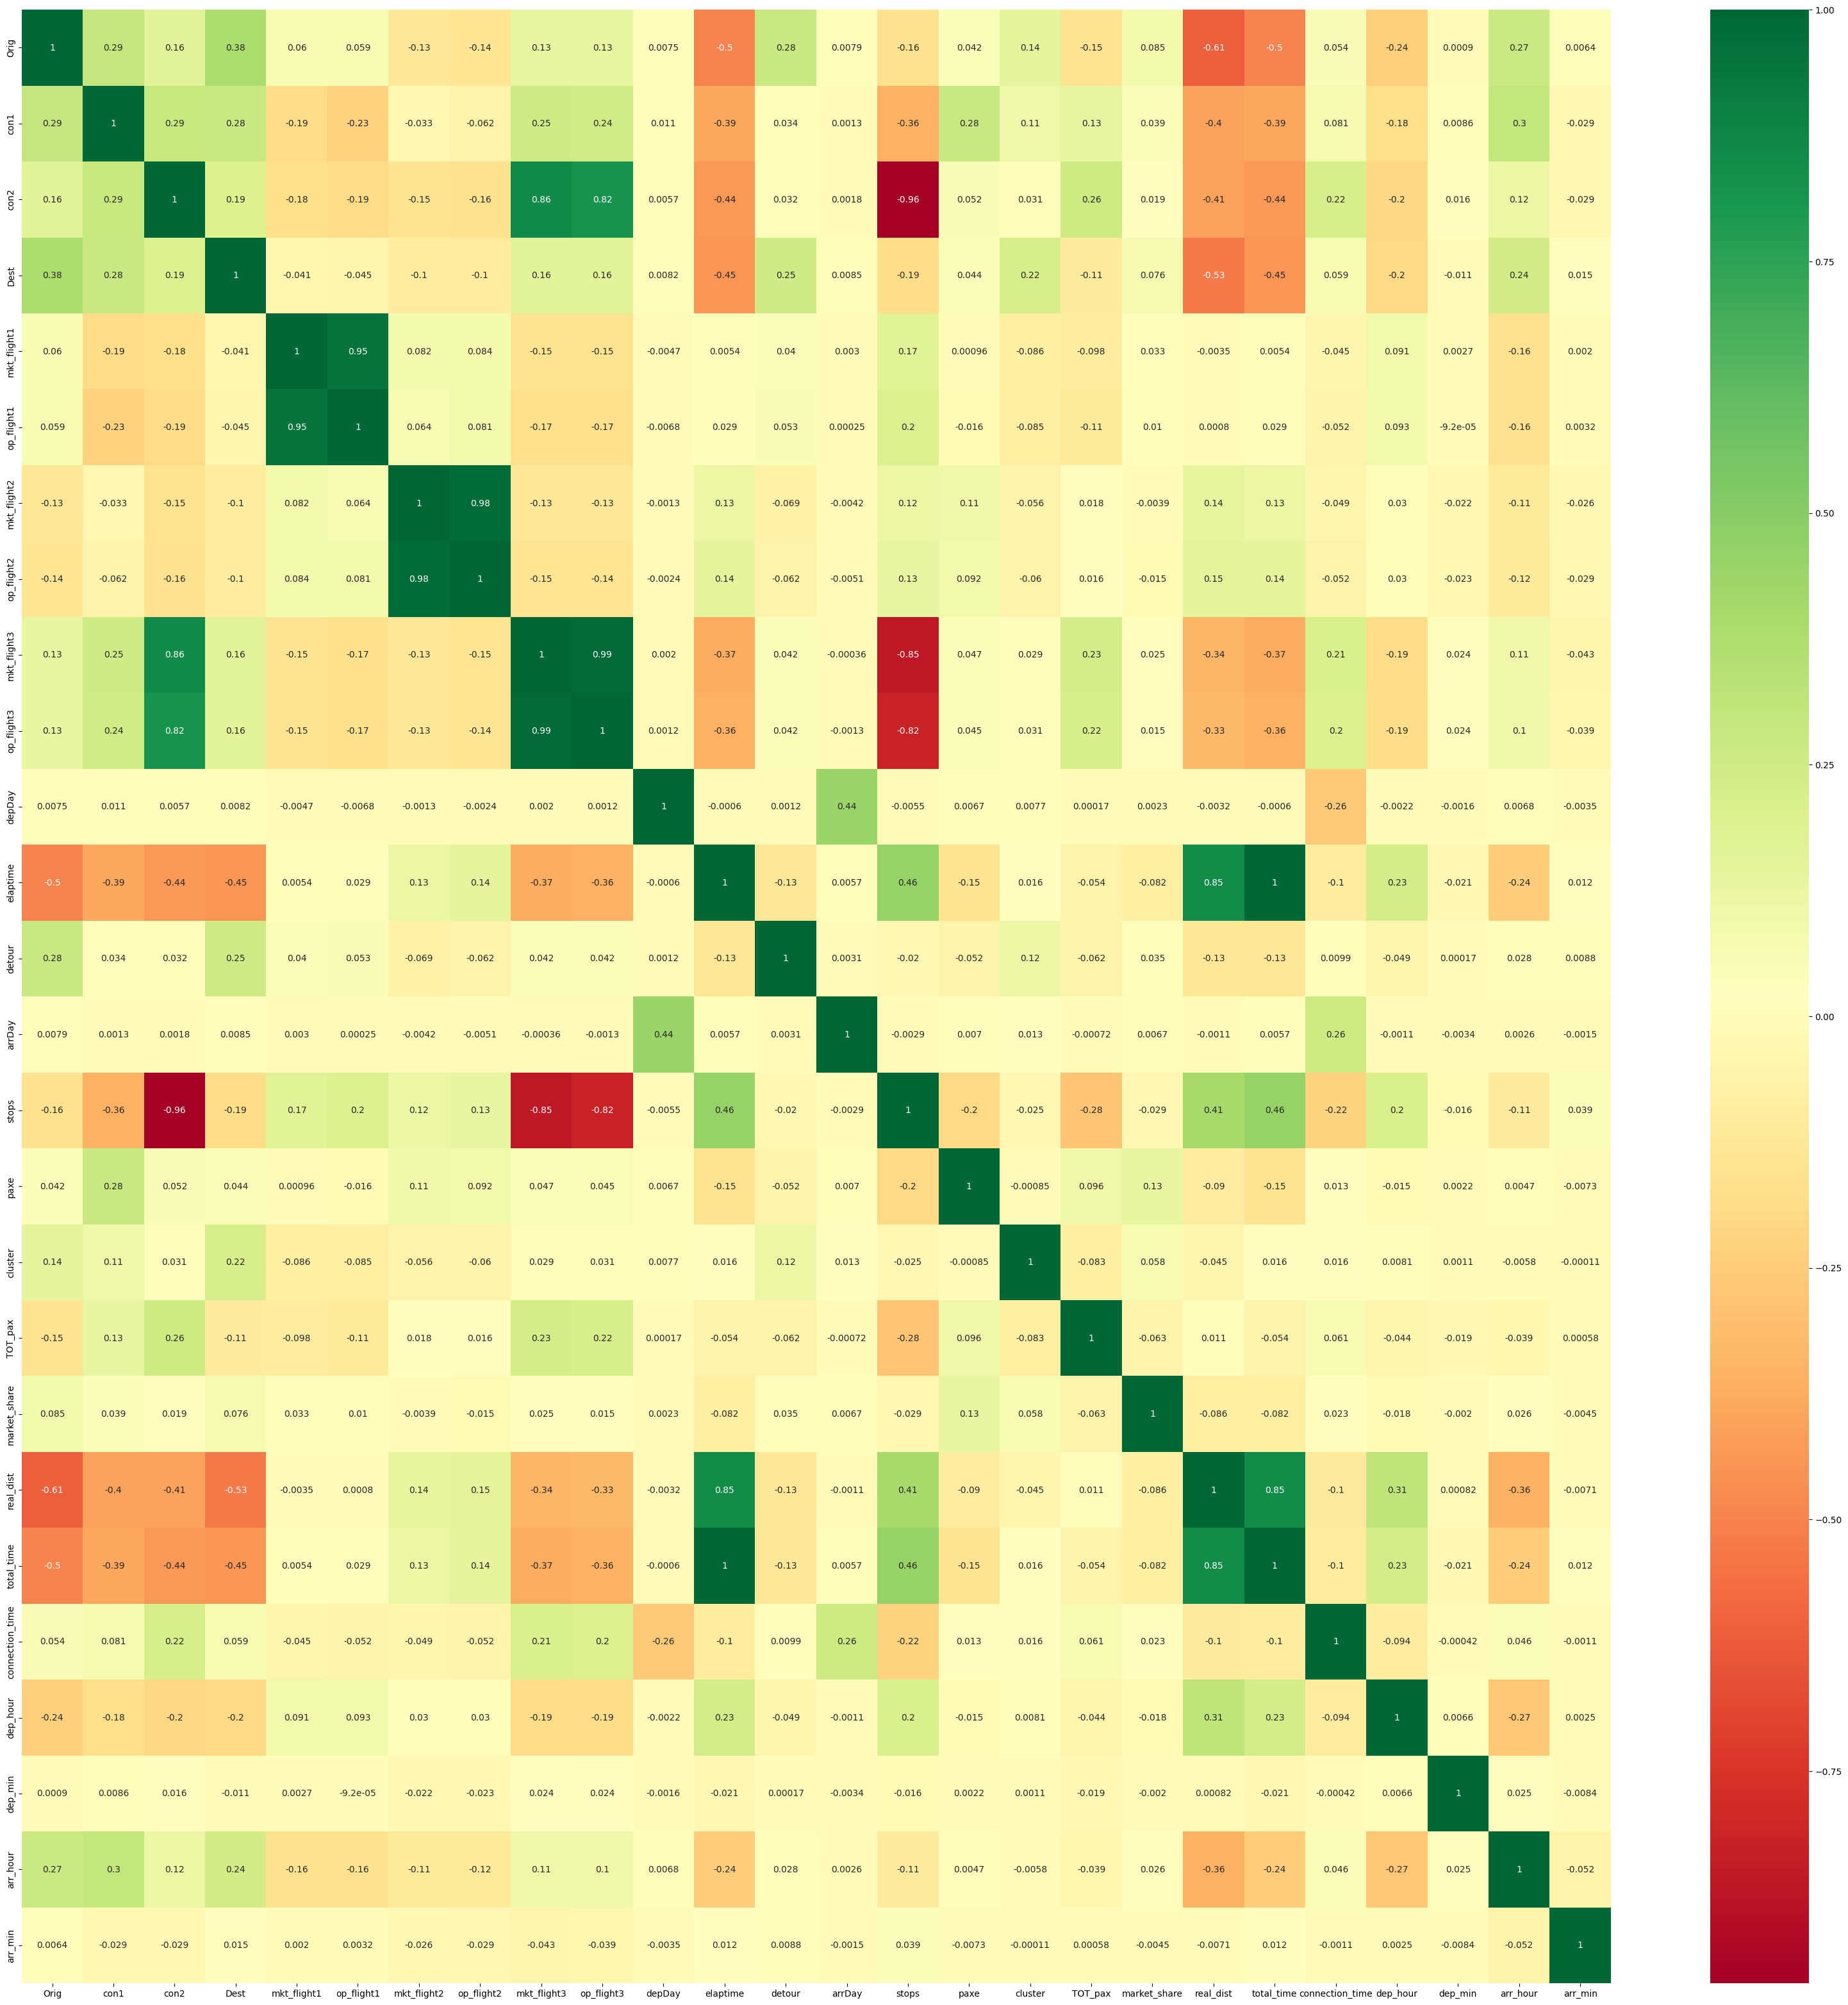

In [51]:
# Finds correlation between Independent and dependent attributes
import seaborn as sns

plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, cmap = "RdYlGn")

plt.show()

In [52]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

# Assuming y is a column-vector (n_samples, 1)
y = y.values.ravel()
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[0.00718465 0.00507976 0.01180476 0.00675438 0.00691411 0.0128105
 0.00347747 0.00373479 0.00364636 0.00559153 0.00232205 0.0057607
 0.00644774 0.00223959 0.01612787 0.37502935 0.00803923 0.48625953
 0.00967254 0.00495042 0.00297267 0.00331465 0.00339377 0.00311403
 0.00335753]


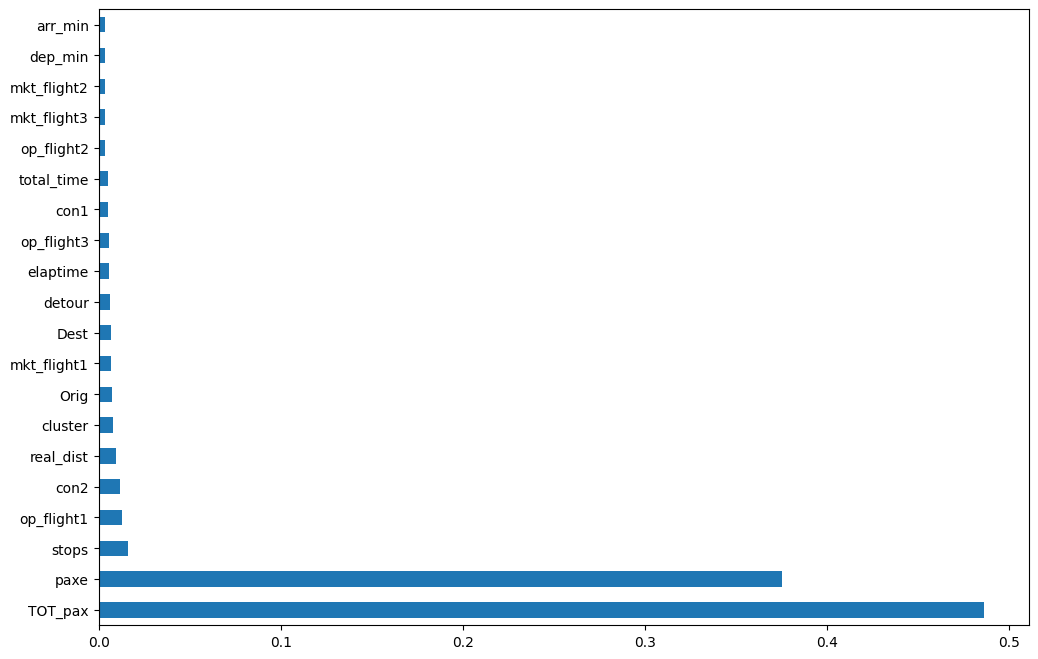

In [53]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
# Based on the results above, drop marketing flights for all three segments & departure and arrival min
df.drop(columns=['mkt_flight1', 'mkt_flight2', 'mkt_flight3', 'arr_min', 'dep_min'], inplace=True)
df.head()

,Orig,con1,con2,Dest,op_flight1,op_flight2,op_flight3,depDay,elaptime,detour,arrDay,stops,paxe,cluster,TOT_pax,market_share,real_dist,total_time,connection_time,dep_hour,arr_hour
0,26,64,239,181,732.0,2624,1101,2.0,535.0,1.02676,3.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0,13,22
1,26,64,239,181,732.0,2624,1101,4.0,535.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0,13,22
2,26,64,239,181,732.0,1748,1101,4.0,775.0,1.02676,5.0,1.0,0.0,111.0,0.0,0.0,3899.12,775.0,0.0,13,2
3,26,64,239,181,732.0,2624,1101,5.0,535.0,1.02676,6.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0,13,22
4,26,64,239,181,732.0,2624,1101,6.0,535.0,1.02676,7.0,1.0,0.0,111.0,0.0,0.0,3899.12,535.0,0.0,13,22


In [57]:
# modified version
df.to_csv('./dataset/dataprep_v2.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522806 entries, 0 to 522805
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Orig             522806 non-null  int64  
 1   con1             522806 non-null  int64  
 2   con2             522806 non-null  int64  
 3   Dest             522806 non-null  int64  
 4   op_flight1       522806 non-null  float64
 5   op_flight2       522806 non-null  int32  
 6   op_flight3       522806 non-null  int32  
 7   depDay           522806 non-null  float64
 8   elaptime         522806 non-null  float64
 9   detour           522806 non-null  float64
 10  arrDay           522806 non-null  float64
 11  stops            522806 non-null  float64
 12  paxe             522806 non-null  float64
 13  cluster          522806 non-null  float64
 14  TOT_pax          522806 non-null  float64
 15  market_share     522806 non-null  float64
 16  real_dist        522806 non-null  floa